In [10]:
import numpy as np
from matplotlib import pyplot as plt

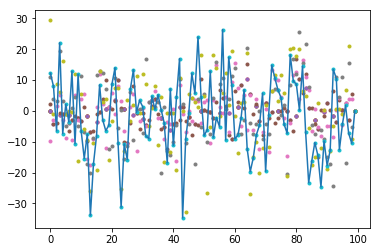

In [179]:
Lx = 100 # Length of field
z = np.zeros(Lx) # Initial topography array
z[:]=np.nan
N = np.sqrt(Lx).astype('int')
A = np.arange(N+1) # Define "amplitude function"
# Array for keeping track of filled points
pts = np.empty(Lx)
pts[:]=np.nan
# Define some initial starting points
pts_start = np.array([0,49,99])
# Assign random numbers to the initial starting points
i=0
for p in pts_start:
    z[int(p)] = A[0]*np.random.normal() # Random number assignment
    pts[int(p)]=int(p) # Keep track of the points that have been filled
    i+=1
    
### Main loop ###
for n in np.arange(N):
    # Isolate the points that have been filled
    pts_filled = pts[~np.isnan(pts)]
    # Define new points half way between the filled points
    pts_new = pts_filled[0:-1]+np.diff(pts_filled)/2
    # Calculate mean topography at new points and add a random number
    i=0
    for p in pts_new:
        pts_around = np.array([pts_filled[i],pts_filled[i+1]]).astype('int')
        mean = np.mean(z[pts_around])
        z[int(p)] = mean+A[n+1]*np.random.normal()
        pts[int(p)]=int(p)
        i+=1
    #print(np.isnan(pts))
    plt.plot(np.arange(0,Lx),z,'.')
plt.plot(z)

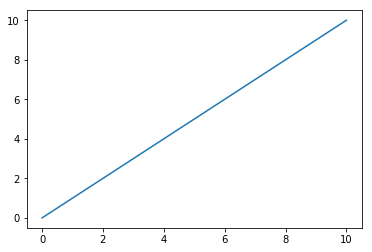

In [180]:
plt.plot(A)